## draw trees

In [2]:
source('drawtrees.R')    
library("plyr") 

In [3]:
setwd('/other/catherine')
meta <- read.table('metadata_all.csv',sep=',',
                      header=TRUE,row.names=1)
tree <- read.tree('results/tree.newick')
tree <- drop.tip(tree, c('pure','PURE','227A', '224B', '228B', '241-B21','C47041710561553RS113'))
tree <- root(tree,'ref')

In [4]:
unique(gmeta$country)

ERROR: Error in eval(expr, envir, enclos): object 'gmeta' not found


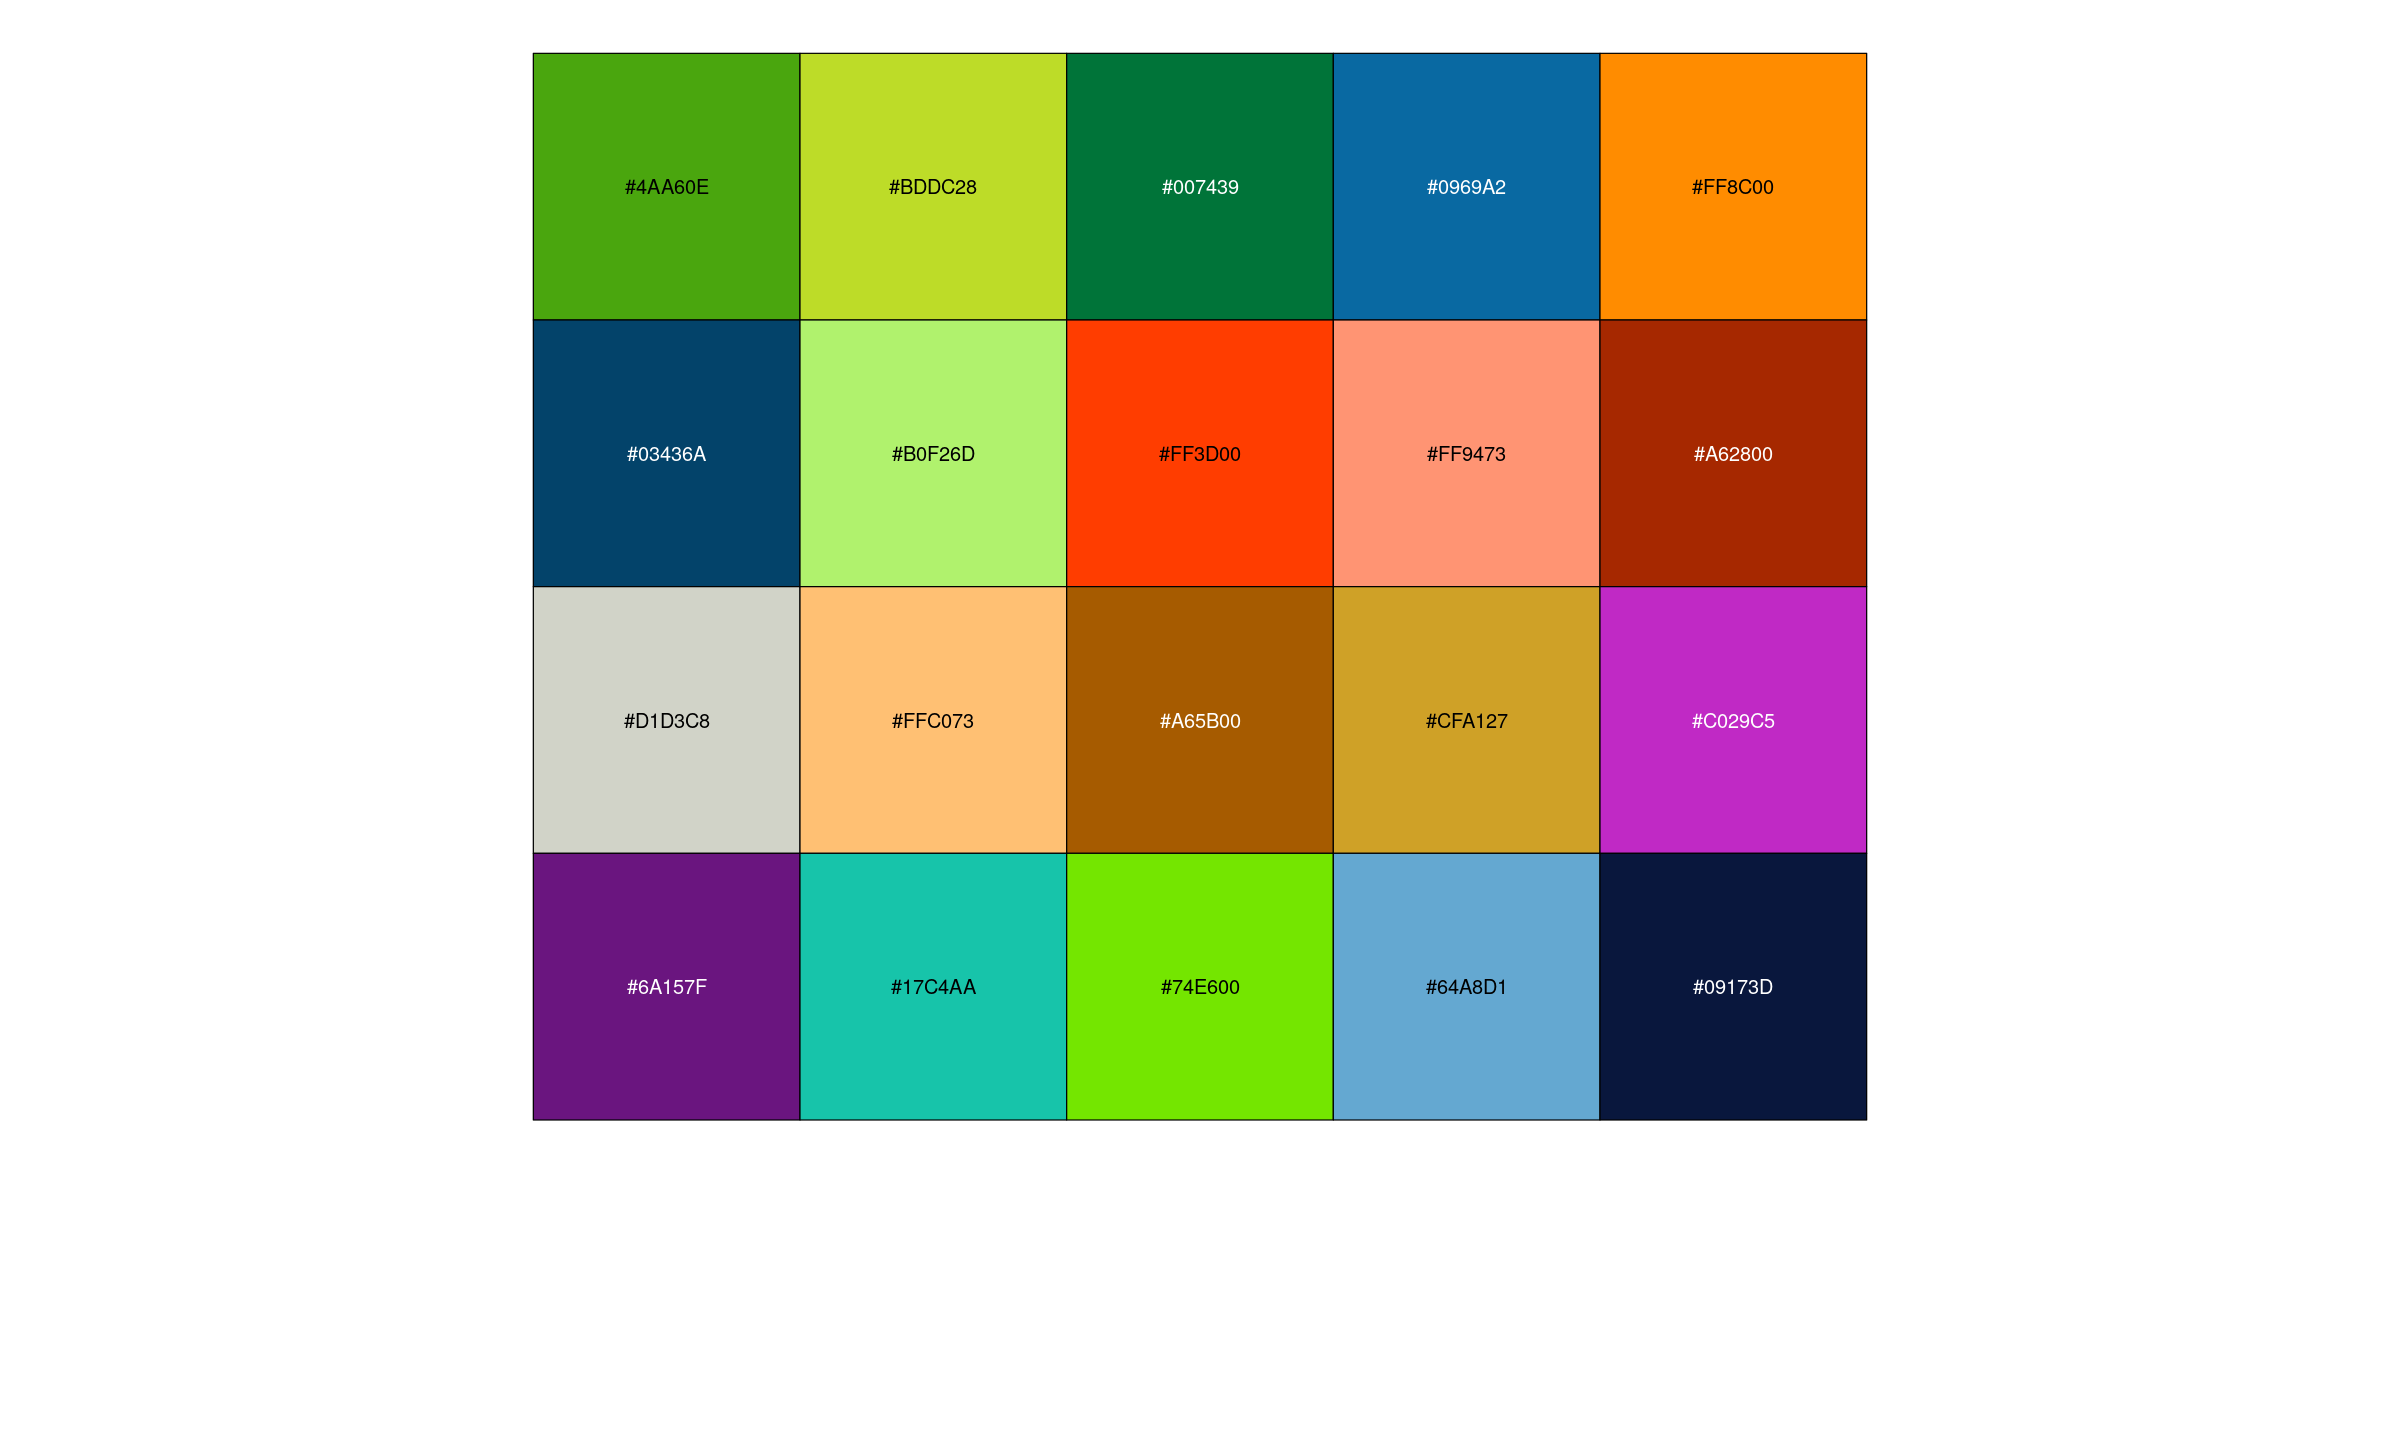

In [28]:
mycolors <- c(
  'Ireland'= "#4AA60E",
  'Scotland'= "#BDDC28",
  'Germany' = "#007439",
  'Finland' = "#0969A2",
  'Poland' = "#FF8C00",
  'Netherlands' = "#03436A",
  'Lithuania' = "#B0F26D",  
  'New Zealand' = "#FF3D00",
  'Canada' = "#FF9473",
  'France' = "#A62800",
  'Russia' = "#D1D3C8",
  'Ethiopia' = "#FFC073",
  'Australia' = "#A65B00",
  'Israel' = "#CFA127",
  'Denmark'= "#C029C5",
  'Belgium'="#6A157F",
  'Spain'="#17C4AA",
  'China'="#74E600",
  'USA' = "#64A8D1",
  'Europe'="#09173D" )

library(scales)
show_col(mycolors)

In [6]:
options(repr.plot.width=22, repr.plot.height=9) 

ggplottree(stree, meta, layout='rect', cols=c('country','vspB','vspN','vspJ','vspA','vspH','vspF','vspG','vspN','vspL'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tiplabelsize=6, offset=2000) + xlim(NA, 55000)
#ggsave(filename = "tree.pdf" , device="pdf", width=20, height=8 , units="in" , limitsize=FALSE)

ERROR: Error in tree$tip.label: object of type 'closure' is not subsettable


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 1 rows containing missing values (`geom_point_g_gtree()`).”


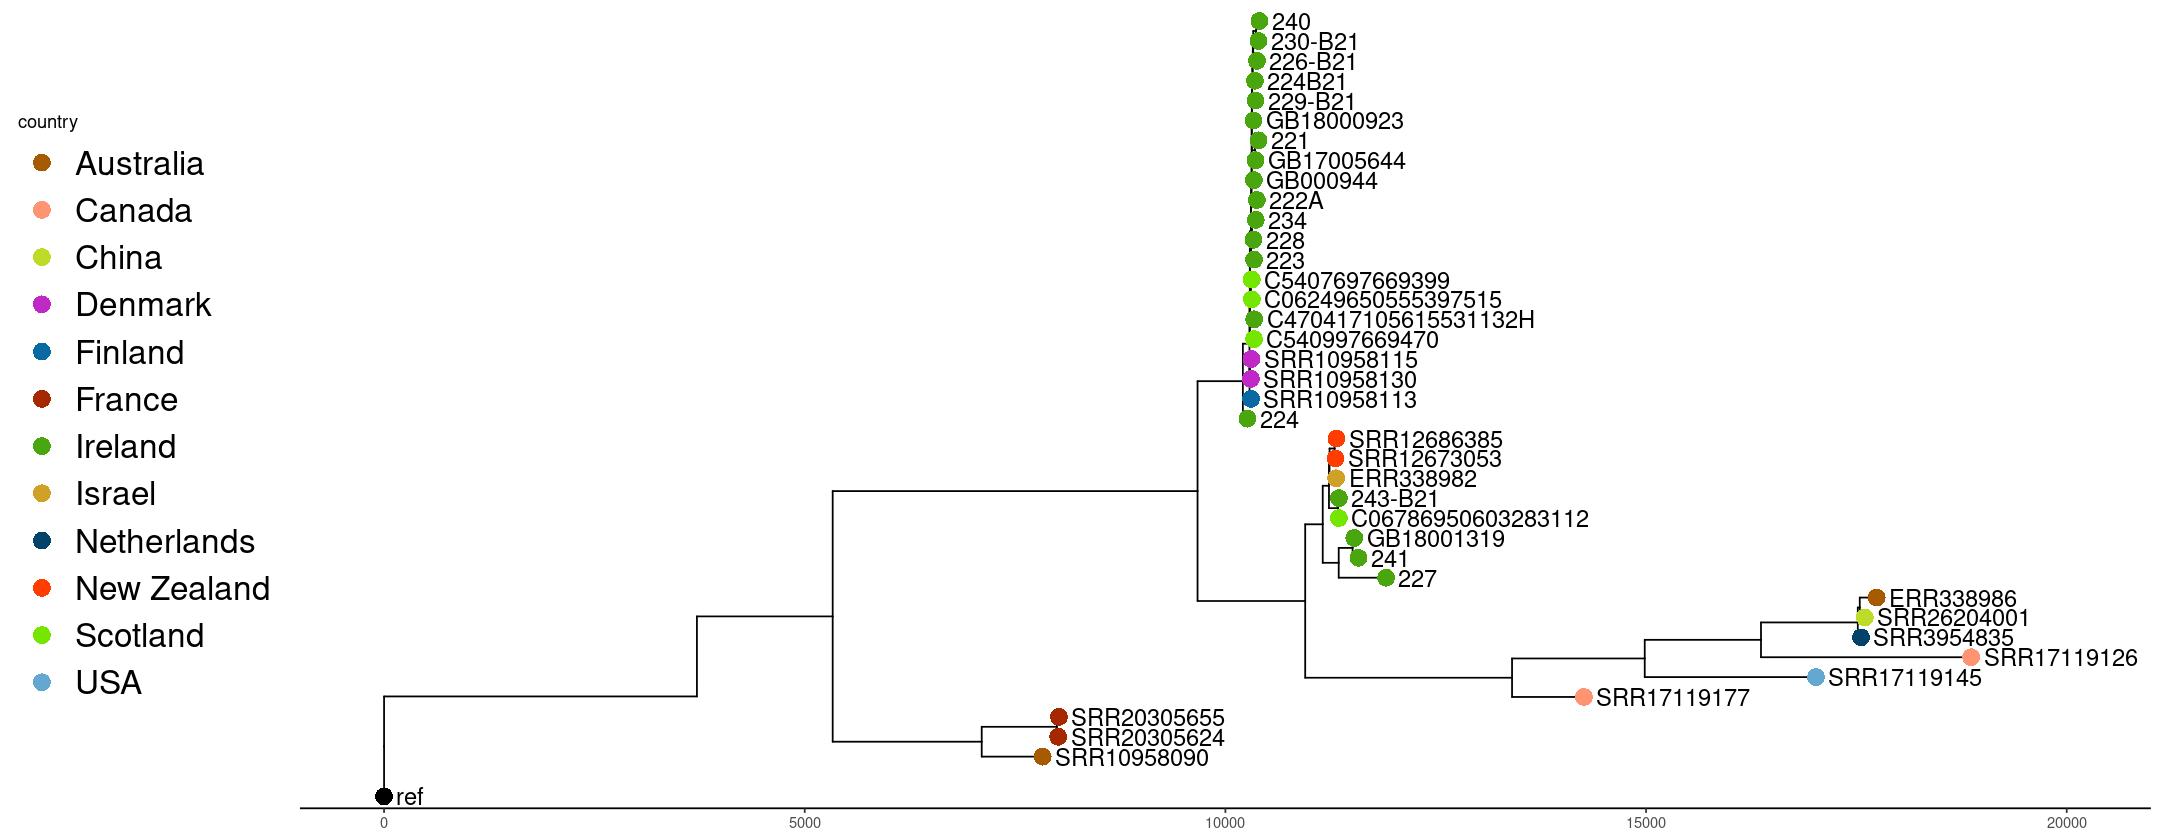

In [7]:
options(repr.plot.width=18, repr.plot.height=7) 
ggplottree(tree, meta, layout='rect', colors=mycolors, cols=c('country'), cmaps=c('Set1'),tipsize=5, tiplabel=TRUE) + xlim(NA, 20000)

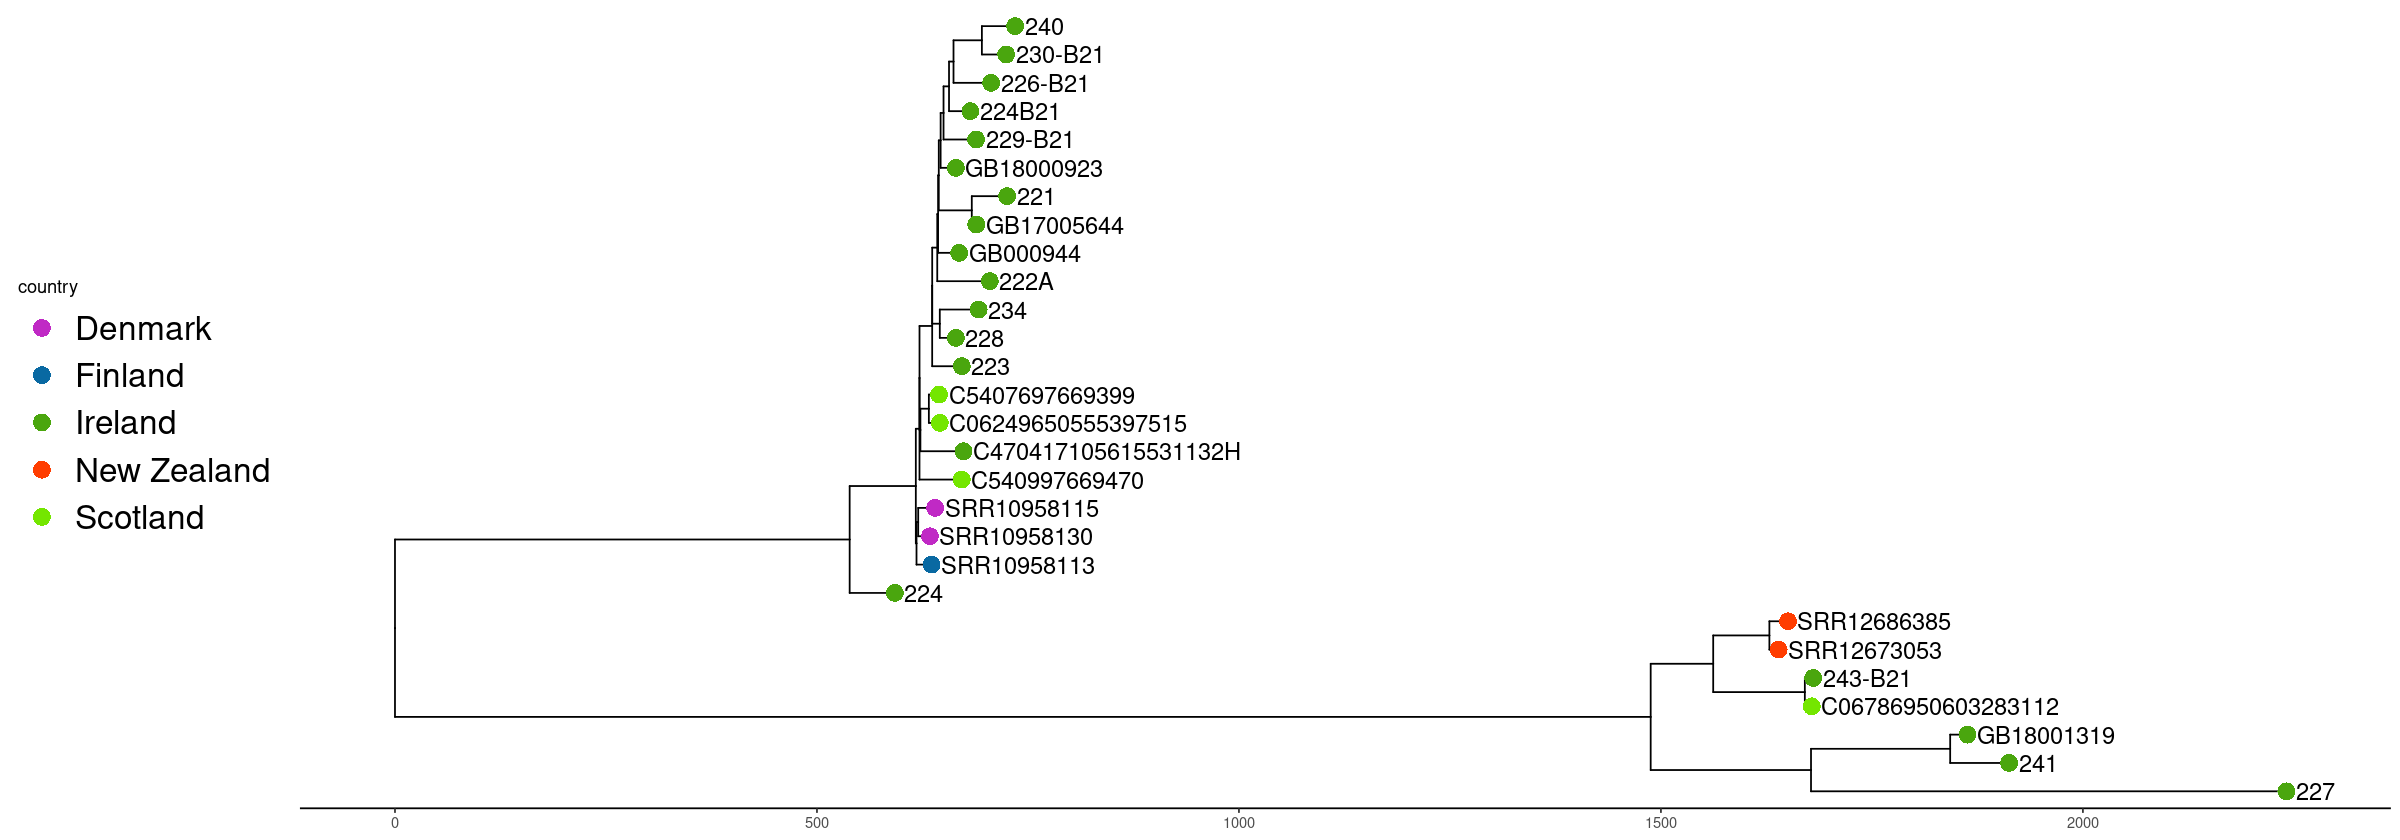

In [195]:
iretips<-row.names(meta[!meta$country %in% c('Ireland','Scotland','Denmark','Finland','New Zealand'),])
tips<-append(iretips, 'ref')
stree <- drop.tip(tree, tips)
options(repr.plot.width=20, repr.plot.height=7)
ggplottree(stree, meta, layout='rect', colors=mycolors, cols=c('country'), cmaps=c('Set1'),tipsize=5, tiplabel=TRUE,offset=600)

## kSNP trees

In [122]:
ktree <- read.tree('ksnp_assembled/tree.core_SNPs.NJ.tre')
ktree <- root(ktree,'PURE')

In [127]:
options(repr.plot.width=22, repr.plot.height=8) 
#(ktree, meta, cols=c('country'), cmaps=c('Set1'), tiplabel=TRUE, tipsize=5) + xlim(NA, 4000)

In [128]:
stree <- drop.tip(ktree, iretips)
options(repr.plot.width=17, repr.plot.height=7)
#ggplottree(stree, meta, layout='rect', cols=c('country'), cmaps=c('Set1','Blues'),tipsize=5, tiplabel=TRUE)

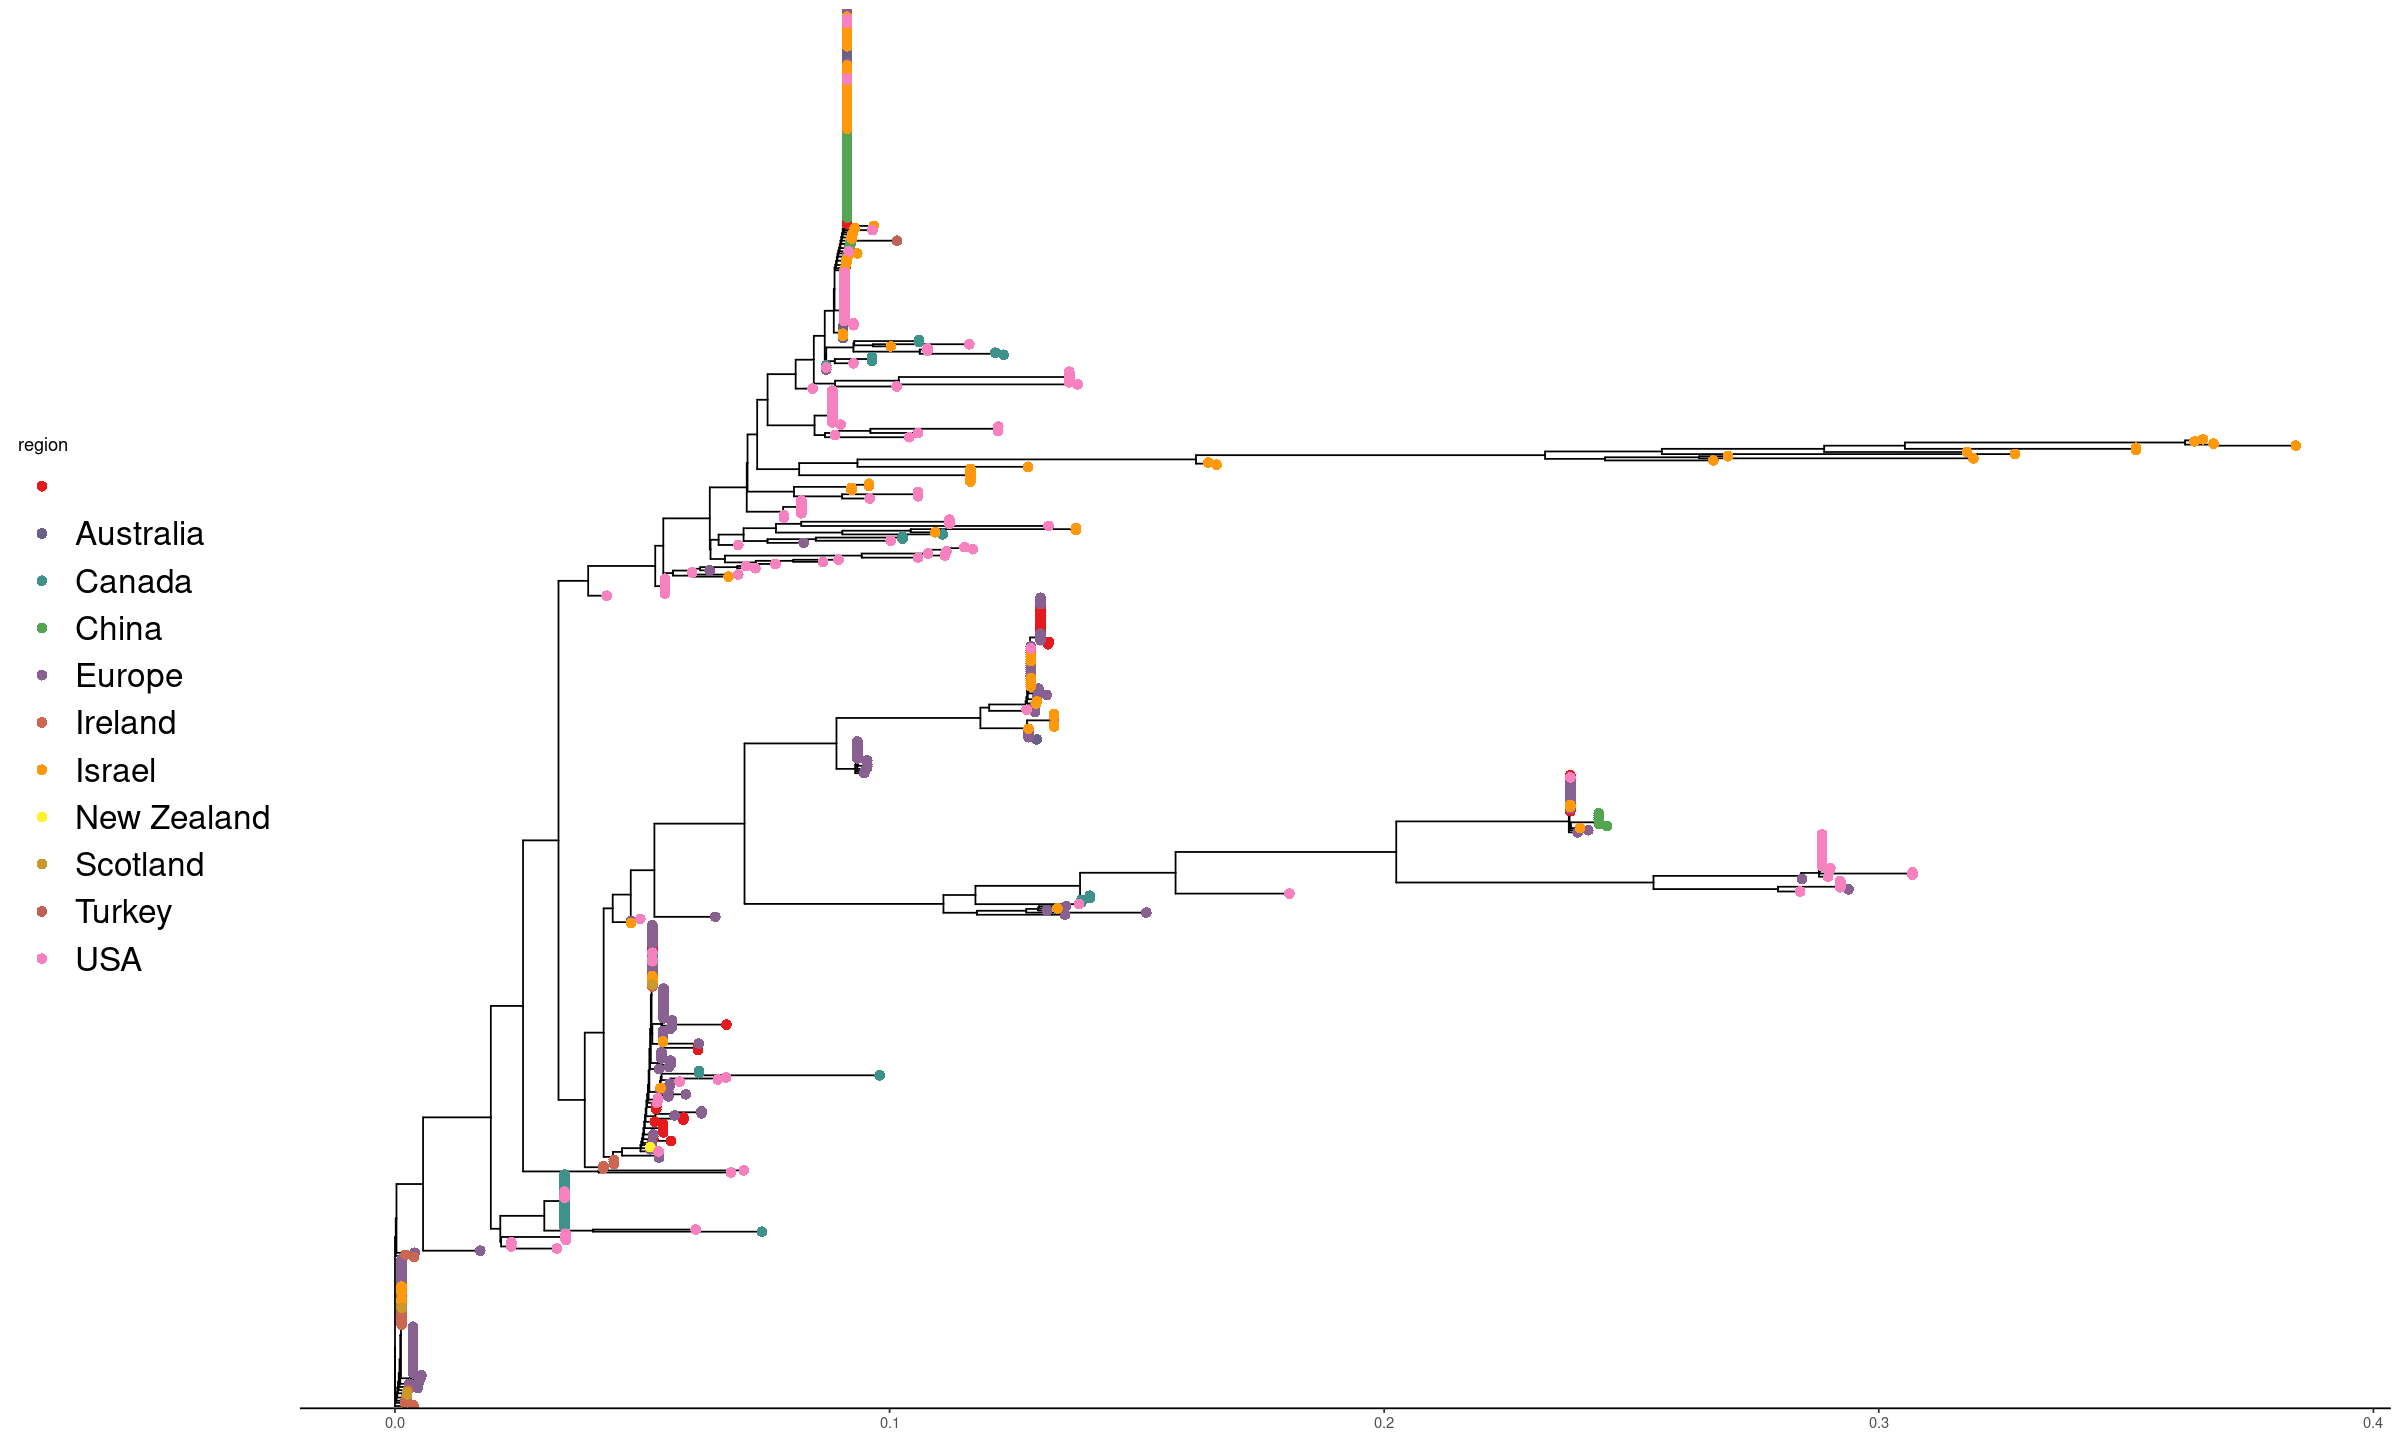

In [25]:
gmeta <- read.csv('assembly_details.csv',row.names=1)
gmeta[] <- lapply(gmeta, as.character)

gtree <- read.tree('ksnp_entrez/tree.core_SNPs.parsimony.tre')
gtree <- drop.tip(gtree,'GCA_005061465')
#gtree <- root(gtree,'CP002188')
ggplottree(gtree, gmeta, layout='rect', cols=c('region'), cmaps=c('Set1','Blues'),tipsize=3,offset=.1) #+ xlim(NA, 100)

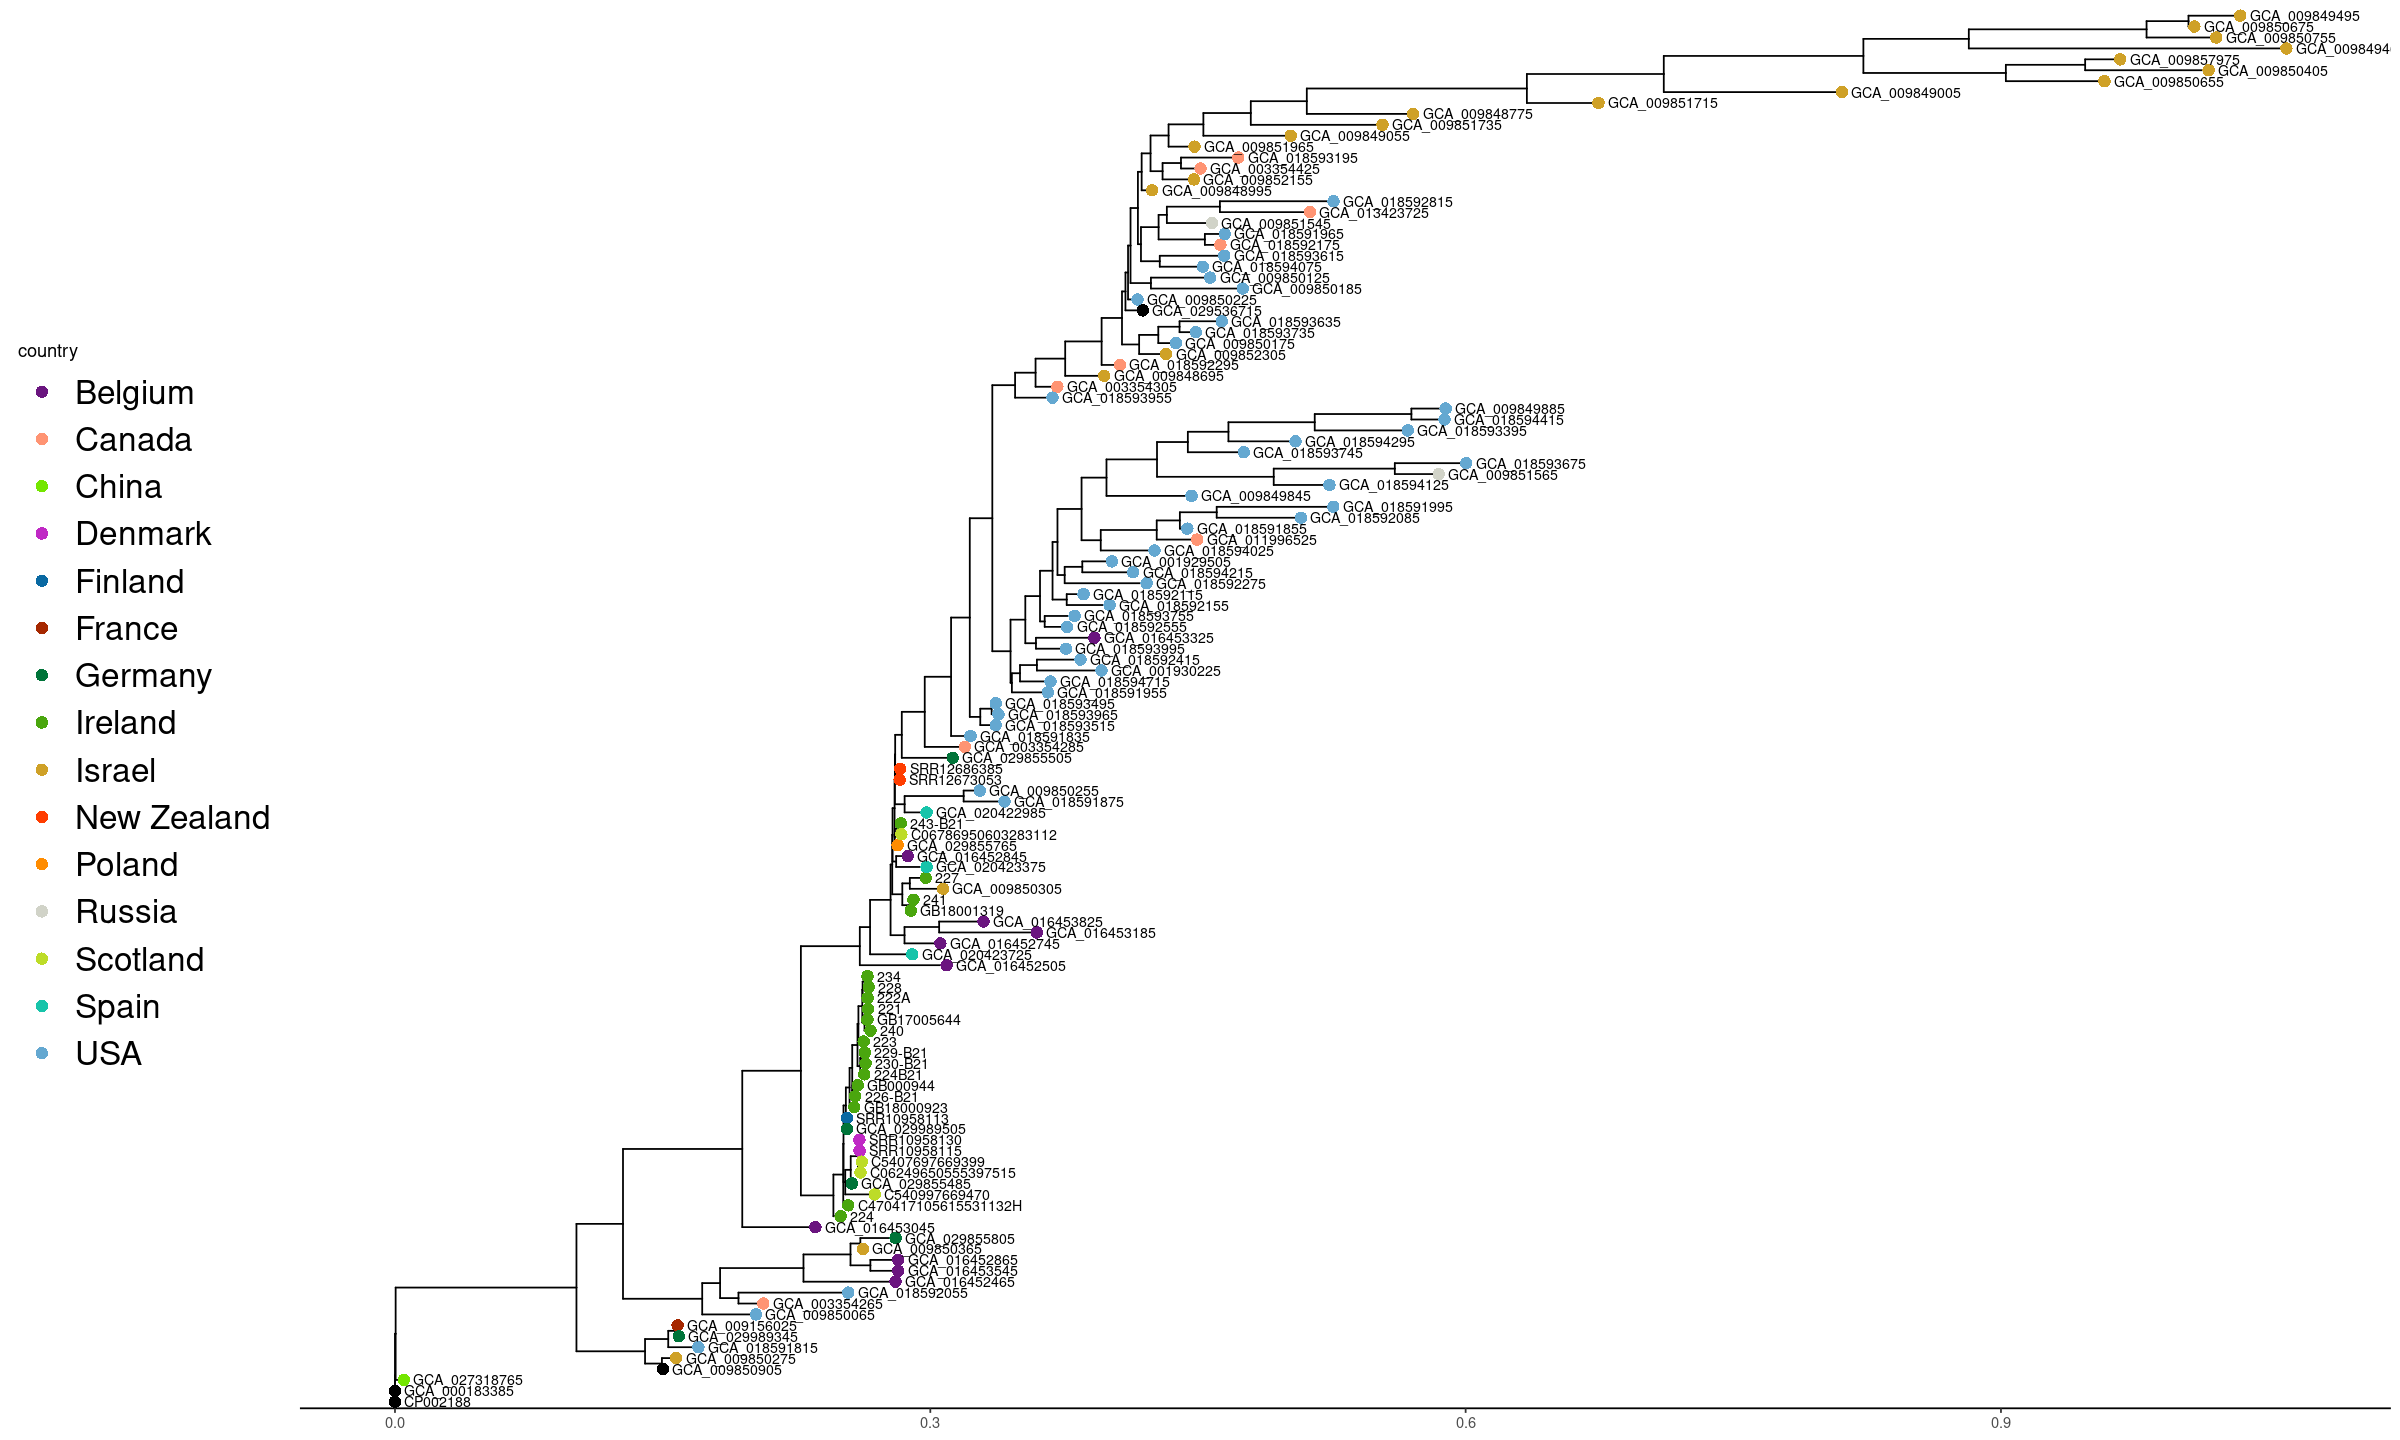

In [294]:
#rtree <- read.tree('ksnp_reduced/tree.core_SNPs.parsimony.tre')
rtree <- read.tree('ksnp_reduced/tree.parsimony.tre')
rtree <- drop.tip(rtree,c('GCA_005061465','pure','PURE','227A', '224B', '228B', '241-B21','C47041710561553RS113'))
rtree <- root(rtree,'CP002188')
#rtree <- root(rtree,'GCA_009849495')
options(repr.plot.width=20, repr.plot.height=12)
ggplottree(rtree, gmeta, layout="rect", colors=mycolors, cols=c('country'), cmaps=c('Set1','Set1'),
           tipsize=3.5,offset=.04,tiplabel=TRUE,tiplabelsize=3) #+ xlim(NA, 100)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


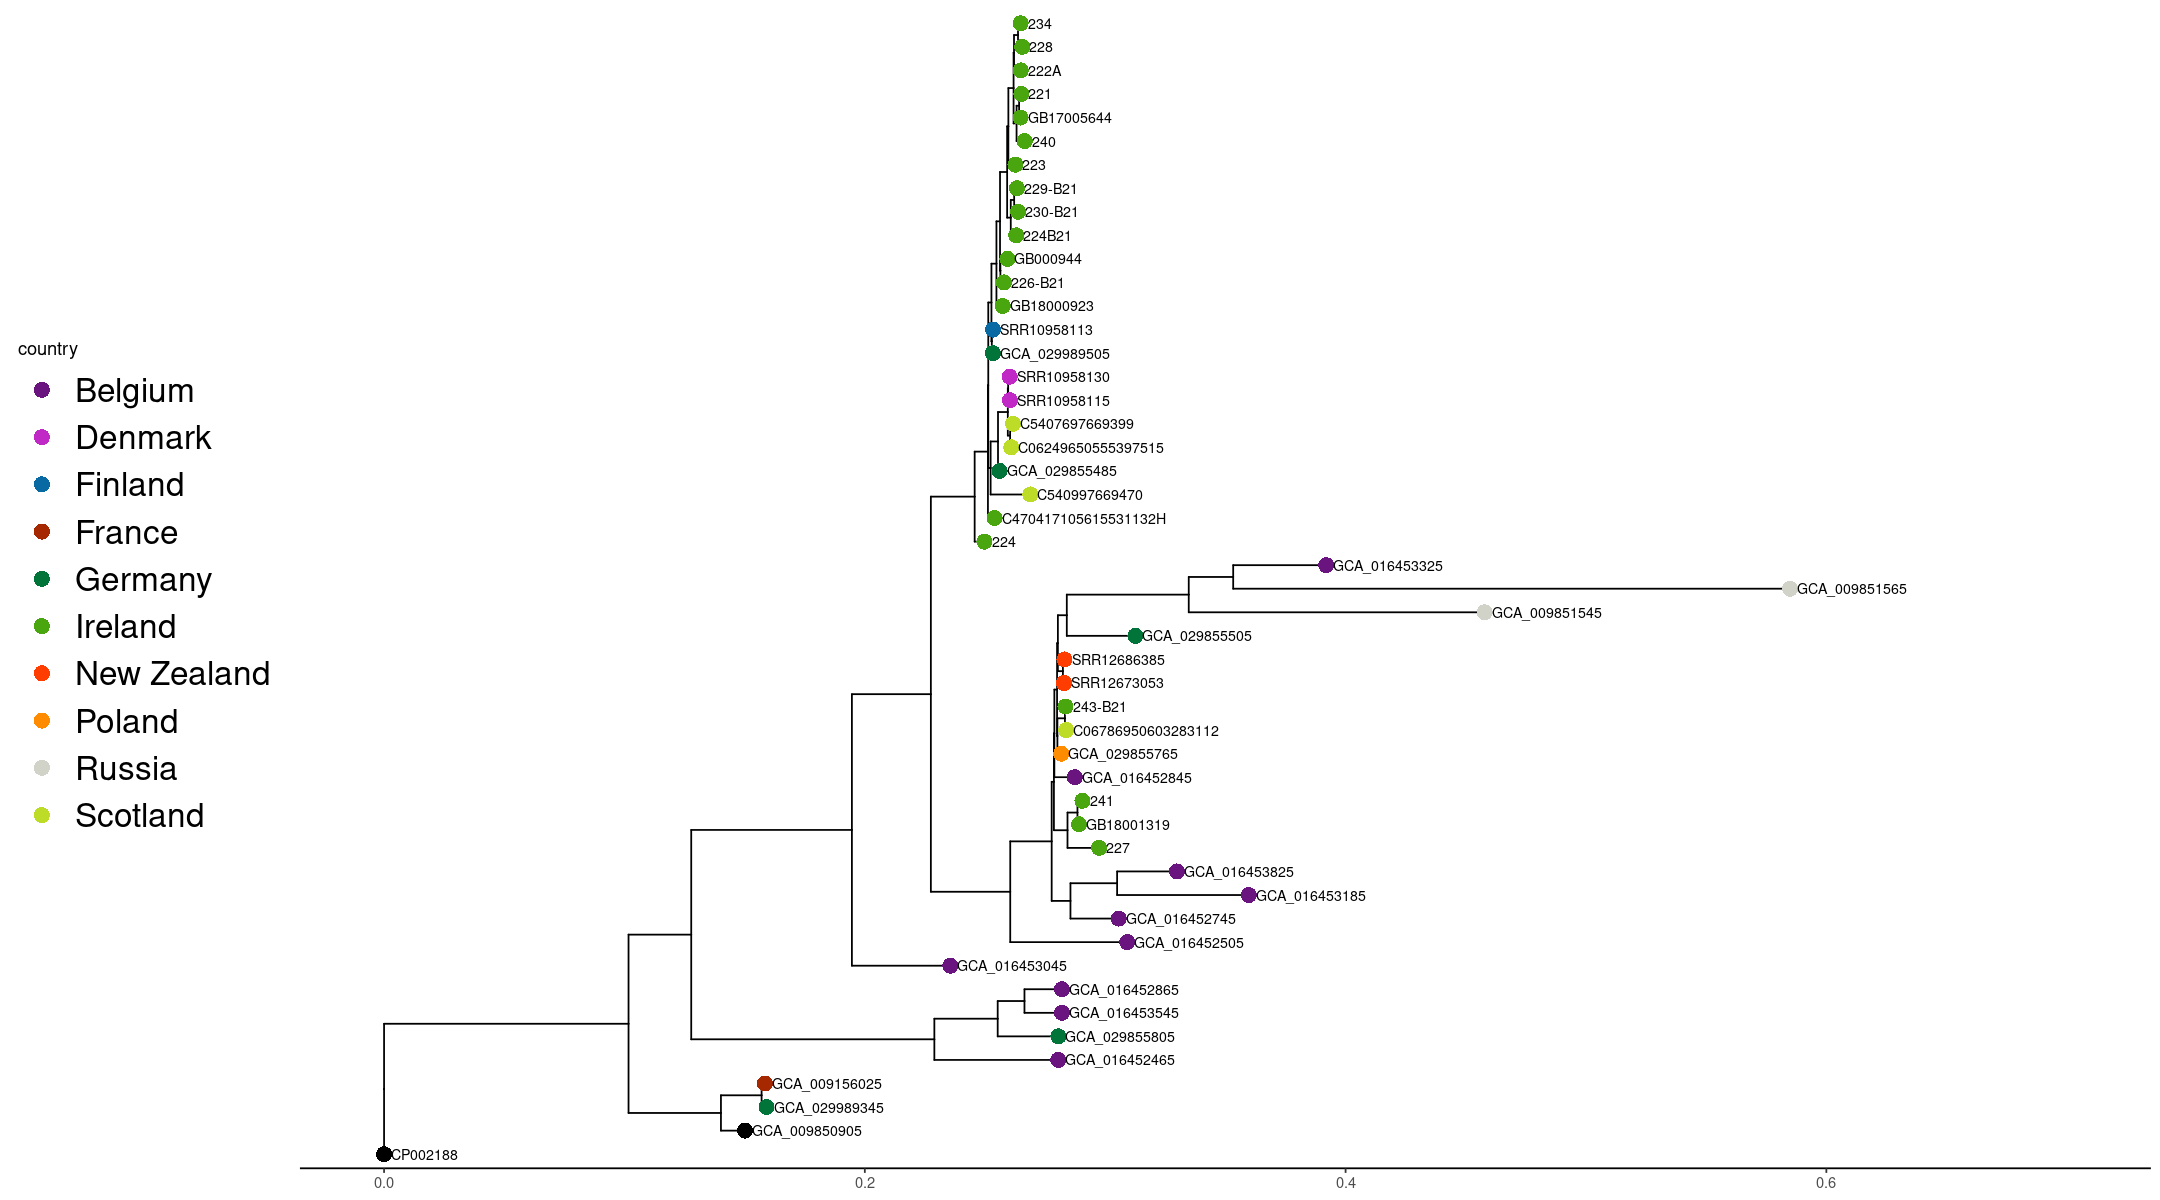

In [313]:
options(repr.plot.width=18, repr.plot.height=10)
common <- getMRCA(rtree,c('234','241','243-B21'))#,'SRR12673053'))
#tr <- extract.clade(rtree,common)

tips<-row.names(gmeta[!gmeta$region %in% c('Europe','Ireland','Scotland','New Zealand'),])
tr <- drop.tip(rtree, tips)

ggplottree(tr, gmeta, layout="rect", colors=mycolors, cols=c('country'), cmaps=c('Set1','Set1'),
           tipsize=4.5,offset=.04,tiplabel=TRUE,tiplabelsize=3) + xlim(NA, .7)

In [ ]:
#aln <- read.dna("ksnp_reduced/core_SNPs_matrix.fasta", format = "fasta")
aln <- read.dna("ksnp_reduced/SNPs_all_matrix.fasta", format = "fasta")
s=tr$tip.label
subaln <- aln[s,]
dm <- dist.dna(subaln)
dm[is.na(dm)] <- 0

In [ ]:
l=5871
dm*l

In [ ]:
samples <- tr$tip.label
pca <- cmdscale(dm)
groups <- as.factor(meta$country)
gmeta$color <- mycolors[gmeta$country]
options(repr.plot.width=10, repr.plot.height=10)
plot(pca[, 1], pca[, 2], pch=20, col = gmeta$color, main = "PCA", cex=3)
par(mar=c(6, 5, 4.1, 8.1), xpd=TRUE)
legend("topright", inset=c(-0.2,0), legend = levels(groups), col = mycolors[levels(groups)], cex=1, pt.cex = 3,pch=16, title = "Groups")

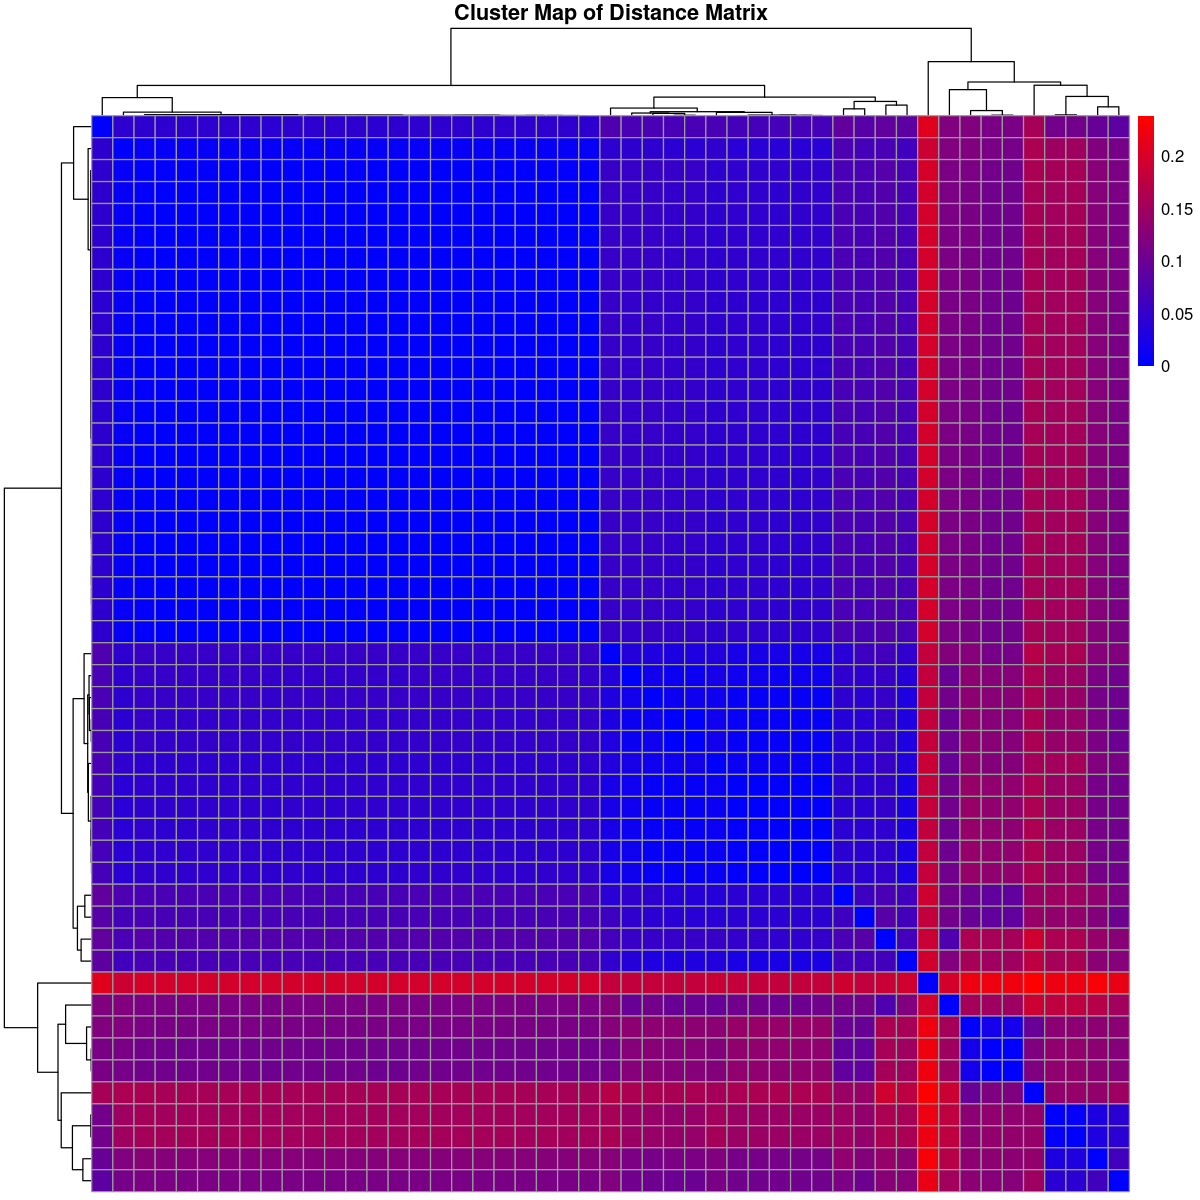

In [305]:
library(pheatmap)
# Create a hierarchical clustering object
hc_rows <- hclust(dist(dm))
hc_cols <- hclust(dist(t(dm)))

# Create a cluster map using pheatmap
pheatmap(
  dm,
  cluster_rows = hc_rows,
  cluster_cols = hc_cols,
  color = colorRampPalette(c("blue", "red"))(100),
  main = "Cluster Map of Distance Matrix",
  annotation_col = row.names(hc_cols),
)